Fit a linear model with individual property data, response:cost

In [54]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [55]:
df = pd.read_csv("../../data/curated/individual_property_final.csv")

In [56]:
df.iloc[1]

Address                         1207/270 King Street, Melbourne VIC 3000
Bedrooms                                                             2.0
Bathrooms                                                            2.0
Closest Gov Secondary School                      University High School
Age under 20                                                         6.0
Age 20-39                                                           83.0
Age 40-59                                                           10.0
Age 60+                                                              1.0
Postcode                                                          3000.0
latitude                                                      -37.813692
longitude                                                     144.954858
SA2  code                                                    206041505.0
income_2020                                                      59201.0
2023                                               

In [57]:
df.columns

Index(['Address', 'Bedrooms', 'Bathrooms', 'Closest Gov Secondary School',
       'Age under 20', 'Age 20-39', 'Age 40-59', 'Age 60+', 'Postcode',
       'latitude', 'longitude', 'SA2  code', 'income_2020', '2023', '2026',
       'CBD Distance', 'Train Distance', 'Electricity Distance',
       'Hospital Distance', 'Library Distance', 'Park Distance',
       'Tourist Attraction Distance', 'Grocery Distance', 'Incidents Recorded',
       'Top 50 School', 'Cost', 'Gov Secondary Distance'],
      dtype='object')

In [58]:
df.head(2)

,Address,Bedrooms,Bathrooms,Closest Gov Secondary School,Age under 20,Age 20-39,Age 40-59,Age 60+,Postcode,latitude,...,Electricity Distance,Hospital Distance,Library Distance,Park Distance,Tourist Attraction Distance,Grocery Distance,Incidents Recorded,Top 50 School,Cost,Gov Secondary Distance
0,"901/22-40 Wills Street, Melbourne VIC 3000",1.0,1.0,University High School,8.0,77.0,12.0,3.0,3000.0,-37.810755,...,0.8477,1.6536,1.5615,0.3633,1.3194,0.4771,25019.0,0.0,600.0,1.5
1,"1207/270 King Street, Melbourne VIC 3000",2.0,2.0,University High School,6.0,83.0,10.0,1.0,3000.0,-37.813692,...,1.3123,1.7040,1.7147,1.0145,0.8704,0.4587,25019.0,0.0,720.0,1.9


In [59]:
# Find all columns that contain "Distance" in their name
distance_columns = [col for col in df.columns if 'Distance' in col]

# Replace -1 with None (NaN) in these columns
df[distance_columns] = df[distance_columns].replace(-1, np.nan)

# Drop rows that contain missing values (NaN)
df = df.dropna()


In [60]:
df.describe()

,Bedrooms,Bathrooms,Age under 20,Age 20-39,Age 40-59,Age 60+,Postcode,latitude,longitude,SA2 code,...,Electricity Distance,Hospital Distance,Library Distance,Park Distance,Tourist Attraction Distance,Grocery Distance,Incidents Recorded,Top 50 School,Cost,Gov Secondary Distance
count,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6.421000e+03,...,6421.000000,6421.000000,6421.00000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000
mean,2.768105,1.555832,22.982597,31.424610,25.215968,20.341599,3282.907180,-37.773660,144.965783,2.086926e+08,...,10.406930,5.421004,3.94593,1.017828,10.817512,3.142455,8370.707086,0.005451,574.694041,2.540025
std,0.994824,0.601042,6.918228,12.966855,4.674621,10.585620,287.874517,0.505490,0.671011,3.745668e+06,...,11.799501,10.519743,11.66489,1.430877,16.080500,6.327246,4986.690167,0.073634,187.118702,3.658751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3000.000000,-38.825069,141.593917,2.010110e+08,...,0.031300,0.014600,0.03060,0.000300,0.023500,0.000200,53.000000,0.000000,33.000000,0.100000
25%,2.000000,1.000000,19.000000,23.000000,23.000000,13.000000,3079.000000,-37.961496,144.874376,2.060411e+08,...,4.280800,1.591900,1.28340,0.393100,4.271800,1.065900,5518.000000,0.000000,460.000000,1.000000
50%,3.000000,2.000000,23.000000,29.000000,25.324321,20.000000,3167.000000,-37.820473,145.013843,2.080312e+08,...,6.901000,2.824000,2.15590,0.663900,7.945900,1.721500,6974.000000,0.000000,550.000000,1.600000
75%,3.000000,2.000000,27.000000,36.000000,28.000000,26.000000,3352.000000,-37.739000,145.138356,2.120316e+08,...,10.732400,5.537000,3.67870,1.110000,13.173800,2.774500,9669.000000,0.000000,660.000000,2.500000
max,5.000000,4.000000,44.000000,100.000000,100.000000,78.000000,3996.000000,-34.168181,148.074042,2.170415e+08,...,105.015300,198.574400,213.38020,22.170000,211.316400,129.836000,25019.000000,1.000000,1300.000000,40.000000


# LR

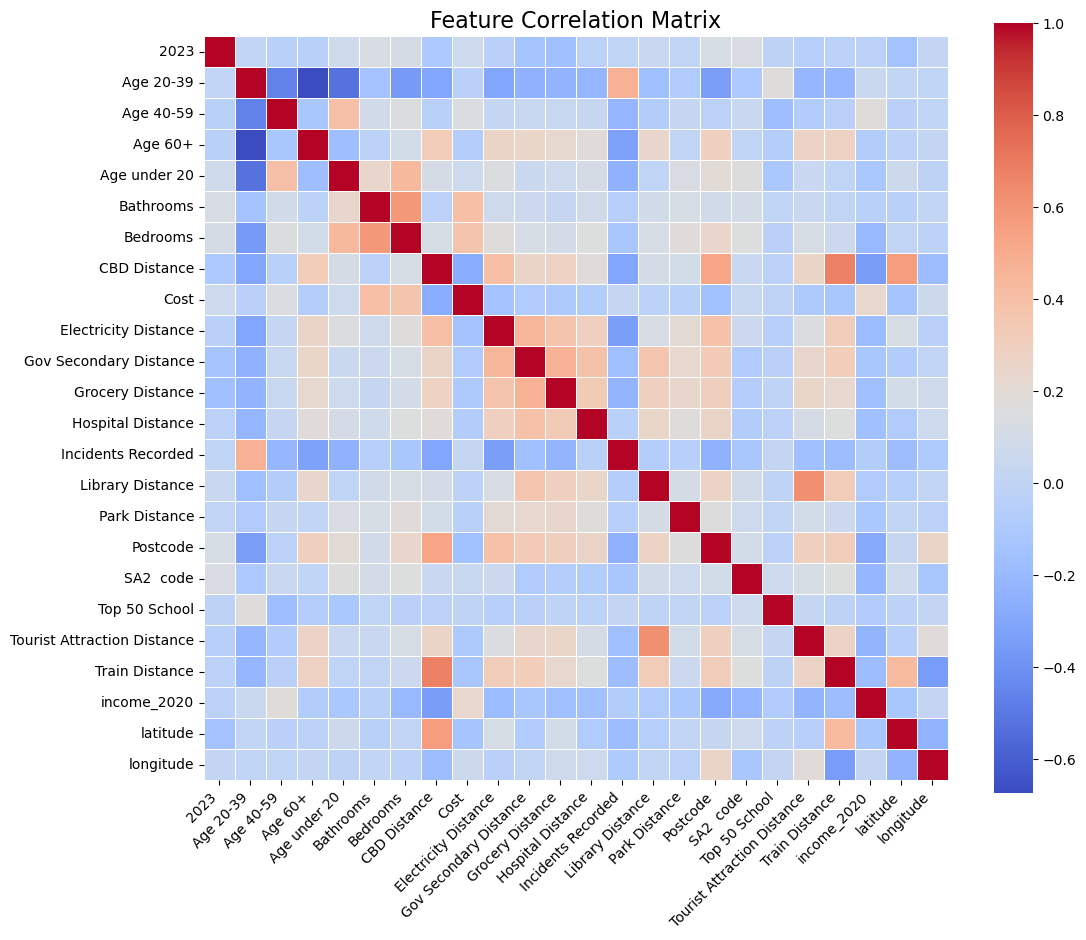

In [61]:
# Draw heat map to show the correlation matrix of numerical features in the domain dataset
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(['Address', 'Closest Gov Secondary School', '2026'])

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True, square=True, linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Separate features and target variable
X = df.drop(['Cost', 'Address', 'Closest Gov Secondary School', 'Postcode', 'SA2  code'], axis=1)  # Features
y = df['Cost']  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform linear regression using sklearn
lr = LinearRegression()
lr.fit(X_scaled, y)

# Coefficients with standardized dataset
# Output the coefficient of each feature
print("Coefficients from sklearn Linear Regression (with Standardization):")
for idx, col in enumerate(X.columns):
    print(f"{col}: {lr.coef_[idx]}")

# P-value with unstandardized dataset
# Use statsmodels to perform regression analysis to check p-values and coefficients
X_sm = sm.add_constant(X)  # Add constant term
model = sm.OLS(y, X_sm)    # Create model
results = model.fit()      # Fit the model

# Output coefficients and p-values
print("\nSummary from statsmodels OLS (without Standardization):")
print(results.summary())


Coefficients from sklearn Linear Regression (with Standardization):
Bedrooms: 73.03082039509934
Bathrooms: 42.16160991564342
Age under 20: -14.9104308741223
Age 20-39: 8.158594144646493
Age 40-59: 11.692197081823082
Age 60+: 2.9360329234471094
latitude: 3.3292697721424074
longitude: 12.214116902509492
income_2020: 35.20520366301151
2023: 54.112610955817416
2026: -60.395452582601735
CBD Distance: -50.37219087385212
Train Distance: 25.680237472792093
Electricity Distance: -12.910140891168444
Hospital Distance: -5.9005831150514485
Library Distance: -5.158138914963546
Park Distance: -6.175931774837912
Tourist Attraction Distance: -7.001114298554563
Grocery Distance: 2.9373594105654997
Incidents Recorded: -2.2111167018397153
Top 50 School: -0.1027413449641431
Gov Secondary Distance: -3.3824810542218704

Summary from statsmodels OLS (without Standardization):
                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:     

In [66]:
# P-value with standardized dataset
# Use statsmodels to perform regression analysis to check p-values and coefficients
X_sm = sm.add_constant(X_scaled)  # Add constant term
model = sm.OLS(y, X_sm)    # Create model
results = model.fit()      # Fit the model

# Output coefficients and p-values
print("\nSummary from statsmodels OLS (with Standardization):")
print(results.summary())



Summary from statsmodels OLS (with Standardization):
                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     162.7
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:11:08   Log-Likelihood:                -41277.
No. Observations:                6421   AIC:                         8.260e+04
Df Residuals:                    6398   BIC:                         8.276e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [65]:
# individual_property = pd.read_csv("../../data/curated/individual_property.csv")

Now, do some preprocess specifically for Linear Model, such as encoding/remove categorical features, normalization. \
Split data into train and test, please fit normalization ONLY on training and apply on test. \
Fit a model, use panelize terms to increase accuracy maybe, show weight for each feature, better to graph it out :D